Dataset created successfully. It shows a non-linear relationship.
Sample data points (X, y):
(0.09, 0.78)
(0.10, 0.33)
(0.20, 1.46)
(0.30, 1.35)
(0.36, 0.82)

Data split: 56 training samples, 24 testing samples.
Random Forest model training complete.
Predictions made successfully.

Sample predictions:
  Actual: 1.65, Predicted: 2.02
  Actual: 0.78, Predicted: 0.76
  Actual: 2.95, Predicted: 2.12
  Actual: 1.76, Predicted: 1.28
  Actual: 1.64, Predicted: 2.25

Model Evaluation:
Mean Squared Error (MSE): 0.28
R-squared (R²): 0.91


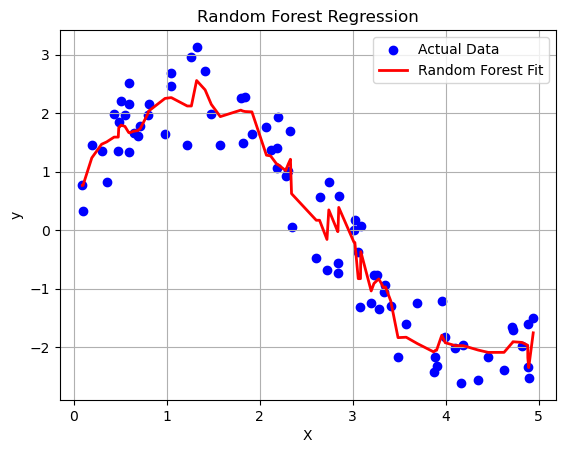


Visualization complete. The plot shows the original data and the smoother prediction curve from the Random Forest.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a simulated non-linear dataset
# This is the same non-linear data as the Decision Tree lab.
np.random.seed(0)

# Independent variable (feature): X
X = np.sort(5 * np.random.rand(80, 1), axis=0)

# Dependent variable (target): y, with a non-linear relationship and noise
y = np.sin(X) * 2 + np.cos(X) + np.random.randn(80, 1) * 0.5

print("Dataset created successfully. It shows a non-linear relationship.")
print("Sample data points (X, y):")
for i in range(5):
    print(f"({X[i][0]:.2f}, {y[i][0]:.2f})")

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nData split: {len(X_train)} training samples, {len(X_test)} testing samples.")

# 3. Train the Random Forest Regressor model
# We'll use a Random Forest with 100 trees. The `max_depth` controls the complexity of each individual tree.
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_model.fit(X_train, y_train.ravel())

print("Random Forest model training complete.")

# 4. Make predictions on the testing data
y_pred = forest_model.predict(X_test)

print("Predictions made successfully.")
print("\nSample predictions:")
for i in range(min(5, len(y_test))):
    print(f"  Actual: {y_test[i][0]:.2f}, Predicted: {y_pred[i]:.2f}")

# 5. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 6. Visualize the results
# To plot the forest's prediction curve, we need to sort the data first.
X_sorted = np.sort(X.flatten())
X_sorted = X_sorted.reshape(-1, 1)

# Predict for the entire sorted range to see the full curve
y_pred_curve = forest_model.predict(X_sorted)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_sorted, y_pred_curve, color='red', linewidth=2, label='Random Forest Fit')
plt.title('Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualization complete. The plot shows the original data and the smoother prediction curve from the Random Forest.")